**Regresión Simple: Predicción del Precio de una Casa Basado en el Tamaño**

---


La regresión simple implica una variable dependiente (Y) y una variable independiente (X). Usaremos un conjunto de datos de ejemplo para ilustrar esto.

# **Paso 1: Importar librerías y preparar datos**
Imaginemos que tenemos un conjunto de datos que contiene el tamaño de la casa (en metros cuadrados) y su precio (en miles de dólares).

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Importar matplotlib para la visualización
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generamos datos de ejemplo (tamaño en metros cuadrados y precio en miles de dólares)
np.random.seed(0)
tamaño = 200 * np.random.rand(100, 1)  # Tamaño de la casa entre 0 y 200 metros cuadrados
precio = 50 + 3 * tamaño + np.random.randn(100, 1) * 10  # Precio de la casa con algo de ruido aleatorio

# Creamos un DataFrame para manejar los datos más fácilmente
data = pd.DataFrame(np.hstack((tamaño, precio)), columns=['Tamaño', 'Precio'])

# Definimos la variable independiente (X) y la variable dependiente (y)
X = data[['Tamaño']]
y = data['Precio']

# Dividimos los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# **Paso 2: Crear y entrenar el modelo**
Creamos una instancia del modelo de regresión lineal y lo entrenamos usando los datos de entrenamiento. Luego, imprimimos los coeficientes del modelo.

In [9]:
# Crear el modelo de regresión lineal
lin_reg = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
lin_reg.fit(X_train, y_train)

# Coeficientes de la regresión lineal
print(f'Intercepto: {lin_reg.intercept_}')
print(f'Coeficiente: {lin_reg.coef_[0]}')


Intercepto: 52.06340188711437
Coeficiente: 2.9990259101004892


# **Paso 3: Hacer predicciones y evaluar el modelo**
Usamos el modelo entrenado para hacer predicciones en el conjunto de prueba. Evaluamos el modelo calculando el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²). Finalmente, visualizamos los resultados con un gráfico.

Mean Squared Error: 91.77532469714298
R^2 Score: 0.9952234069453337


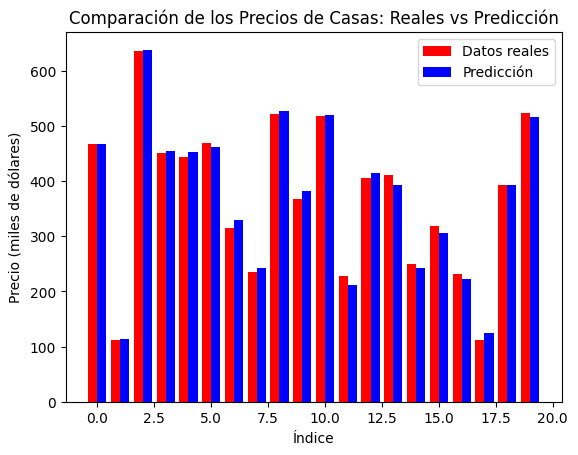

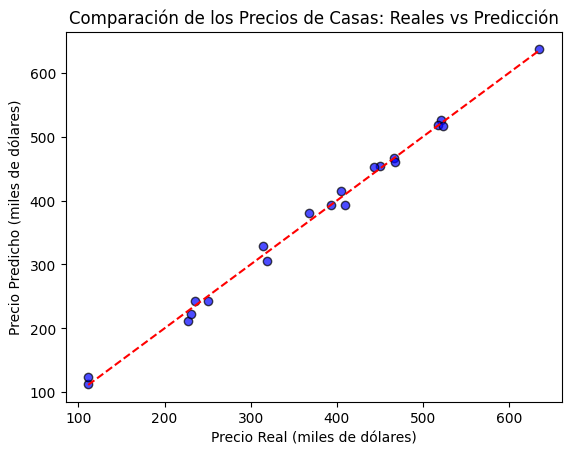

In [10]:
# Realizar predicciones en el conjunto de prueba
y_pred = lin_reg.predict(X_test)

# Evaluar el modelo con métricas de desempeño
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Gráfico de barras
indices = np.arange(len(y_test))
plt.bar(indices - 0.2, y_test.to_numpy(), width=0.4, label='Datos reales', color='red')
plt.bar(indices + 0.2, y_pred, width=0.4, label='Predicción', color='blue')
plt.title('Comparación de los Precios de Casas: Reales vs Predicción')
plt.xlabel('Índice')
plt.ylabel('Precio (miles de dólares)')
plt.legend()
plt.show()

# Gráfico de dispersión con línea de tendencia
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Comparación de los Precios de Casas: Reales vs Predicción')
plt.xlabel('Precio Real (miles de dólares)')
plt.ylabel('Precio Predicho (miles de dólares)')
plt.show()
